## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [2]:
import numpy as np
import pandas as pd

In [3]:
#(i)
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data, index = labels)

#2.
birds.info()

#3.
birds[::2]

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [4]:
#1.
birds.loc[['a','c','g'],['birds','age']]

#2.
birds[birds['visits'] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [5]:
#1.
birds[(birds['age'].isnull()) | (birds['visits'].isnull())]

#2.
birds['age'].fillna(birds['age'].mean())

,age
a,3.500000
b,4.000000
c,1.500000
d,4.333333
e,6.000000
f,3.000000
g,5.500000
h,4.333333
i,8.000000
j,4.000000


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [6]:
#1.
print("Totol visits for Cranes :",birds[birds['birds'] == 'Cranes']['visits'].sum())

#2.
print(birds['birds'].value_counts())

#3.
print("no. of duplicate rows :", birds.duplicated().sum())

#4.
birds.drop_duplicates(inplace = True)
birds

Totol visits for Cranes : 14
birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64
no. of duplicate rows : 1


,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

In [7]:
ipl = pd.read_csv('IPL_Matches_2008_2022.csv')
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [8]:
ipl = ipl.replace(
    {
        'Delhi Daredevils': 'Delhi Capitals',
        'Kings XI Punjab': 'Punjab Kings',
        'Rising Pune Supergiants': 'Rising Pune Supergiant'
    }
)
ipl.sample()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
363,1082600,Mumbai,2017-04-12,2017,10,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,4.0,NaN,JJ Bumrah,"['PA Patel', 'JC Buttler', 'RG Sharma', 'N Ran...","['S Dhawan', 'DA Warner', 'DJ Hooda', 'Yuvraj ...",Nitin Menon,CK Nandan


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


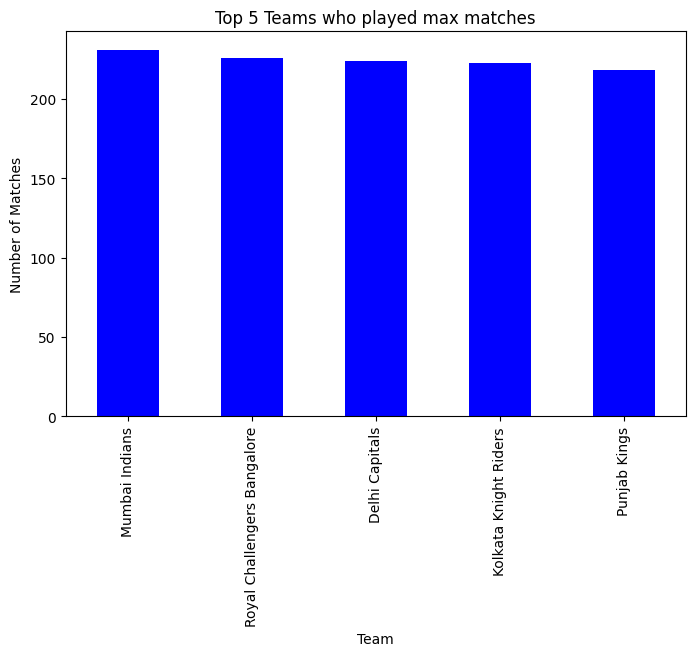

In [9]:
t1 = ipl['Team1'].value_counts()
t2 = ipl['Team2'].value_counts()
top_teams = (t1 + t2).sort_values(ascending=False).head(5)

import matplotlib.pyplot as plt

top_teams.plot(kind='bar', color='blue', figsize=(8,5))

plt.title("Top 5 Teams who played max matches")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.show()


###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [10]:
#wo matches jisme Mumbai Indian kheli hai
temp = ipl[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')]
#wo matches jisme Mumbai Indians Haari hai
temp = temp[temp['WinningTeam'] != 'Mumbai Indians']
#Most no. of POTM
temp['Player_of_Match'].value_counts().head(1)

,count
Player_of_Match,
KL Rahul,4


###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [11]:
def record(team1, team2):
    matches = ipl[((ipl['Team1'] == team1) & (ipl['Team2'] == team2)) |
                  ((ipl['Team1'] == team2) & (ipl['Team2'] == team1))]

    win_loss = matches['WinningTeam'].value_counts()

    potm = matches['Player_of_Match'].value_counts().head(1)

    print(f"Head-to-Head: {team1} vs {team2}\n")
    print("Win/Loss Record:")
    print(win_loss, "\n")
    print("Top Player of the Match Performer:")
    print(potm)

In [12]:
record('Kolkata Knight Riders','Chennai Super Kings')

Head-to-Head: Kolkata Knight Riders vs Chennai Super Kings

Win/Loss Record:
WinningTeam
Chennai Super Kings      17
Kolkata Knight Riders     9
Name: count, dtype: int64 

Top Player of the Match Performer:
Player_of_Match
RA Jadeja    3
Name: count, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



In [13]:
top_citites = ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]["City"].value_counts().head(7)
top_citites

,count
City,
Kolkata,74
Mumbai,23
Abu Dhabi,14
Chennai,12
Bangalore,11
Delhi,10
Pune,9


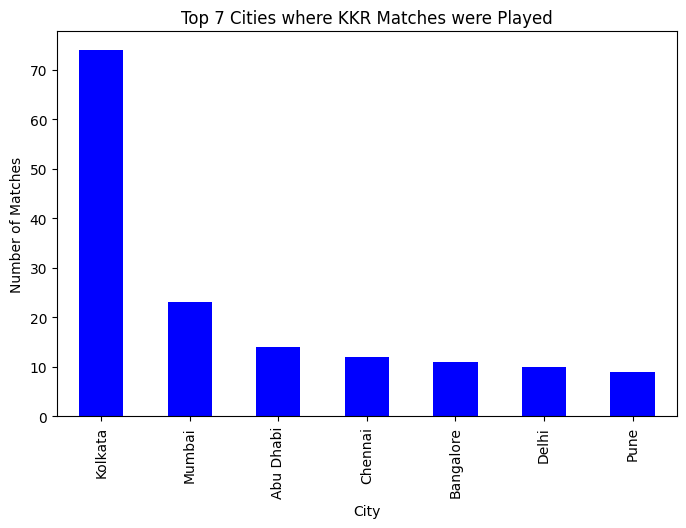

In [14]:
top_citites.plot(kind='bar', color='blue', figsize=(8,5))

plt.title("Top 7 Cities where KKR Matches were Played")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.show()